# **Solar Project**

Vincent ha

CS458

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [3]:
dateParser = lambda x: pd.datetime.strptime(x, '%Y%m%d %H:%M')

#I have no idea why but attempting to load and then parse as done in trainData does not work for testData
testData = pd.read_csv(r"C:\Users\vynne\Downloads\solar_test.csv")
testData['TIMESTAMP'] = pd.to_datetime(testData['TIMESTAMP'], format = '%Y%m%d %H:%M')
trainData = pd.read_csv(r"C:\Users\vynne\Downloads\solar_training.csv", parse_dates= ['TIMESTAMP'], date_parser= dateParser)

features = testData.columns.tolist()[2:14]
forecastPeriod = 168

#splits by zone id
trainZone_one = trainData.groupby('ZONEID').get_group(1)
trainZone_two = trainData.groupby('ZONEID').get_group(2)
trainZone_three = trainData.groupby('ZONEID').get_group(3)

testZone_one = testData.groupby('ZONEID').get_group(1)
testZone_two = testData.groupby('ZONEID').get_group(2)
testZone_three = testData.groupby('ZONEID').get_group(3)

# trainZone_one.index = trainZone_one['TIMESTAMP']
# trainZone_two.index = trainZone_two['TIMESTAMP']
# trainZone_three.index = trainZone_three['TIMESTAMP']

# testZone_one.index = testZone_one['TIMESTAMP']
# testZone_two.index = testZone_two['TIMESTAMP']
# testZone_three.index = testZone_three['TIMESTAMP']

C:\Users\vynne\AppData\Local\Temp\ipykernel_12464\3259101549.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateParser = lambda x: pd.datetime.strptime(x, '%Y%m%d %H:%M')


In [4]:
from sklearn.metrics import mean_absolute_error as MAE
clf = RandomForestRegressor()

In [5]:
optimal = 1
bestI = 0

nEst = [100, 250, 500, 750, 1000]
maxFeat = [.2, .3, .4, .5, .6]
minSampSplit = [5, 10, 20, 30, 40]
minSampLeaf = [1, 2, 5, 10]

bestH = bestI = bestJ = bestK = 0

for h in nEst:
    for i in maxFeat:
        for j in minSampSplit:
            for k in minSampLeaf:
                clf = RandomForestRegressor(n_estimators=h, max_features=i, min_samples_split=j, min_samples_leaf=k)
                clf.fit(trainZone_one[features].loc[trainZone_one.index[0]:(trainZone_one.index[-1]-forecastPeriod)], trainZone_one['POWER'].loc[(trainZone_one.index[0]+(forecastPeriod)):])
                temp = MAE(clf.predict(testZone_one.loc[:, features]) , testZone_one['POWER'])
                if(temp < optimal):
                    optimal = temp
                    print(optimal)
                    bestH = h
                    bestJ = j
                    bestI = i
                    bestK = k
                
print("best n_estimator - ", bestH)
print("best max_features - ", bestI)
print("best min_samples_split - ", bestJ)
print("best min_samples_leaf - ", bestK)

0.08885416468794115
0.08818028244242482
0.08155846847070931
0.0809309388120527
0.08072138254007444
0.0784428132573562
0.07782768926443753
0.07697713428327878
0.07480848492633291
0.0740908760793886
0.07389002595019785
0.07360691871847003
0.07313317264302545
0.07296262240986395
0.07291467725631144
0.07281706818866153
best n_estimator -  250
best max_features -  0.6
best min_samples_split -  10
best min_samples_leaf -  5


Zone 1
Mean absolute error -  0.07472618244659726
Root mean absolute error -  0.27336090145921976


C:\Users\vynne\AppData\Local\Temp\ipykernel_22160\2939504819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testZone_one['prediction'] = clf.predict(testZone_one.loc[:, features])


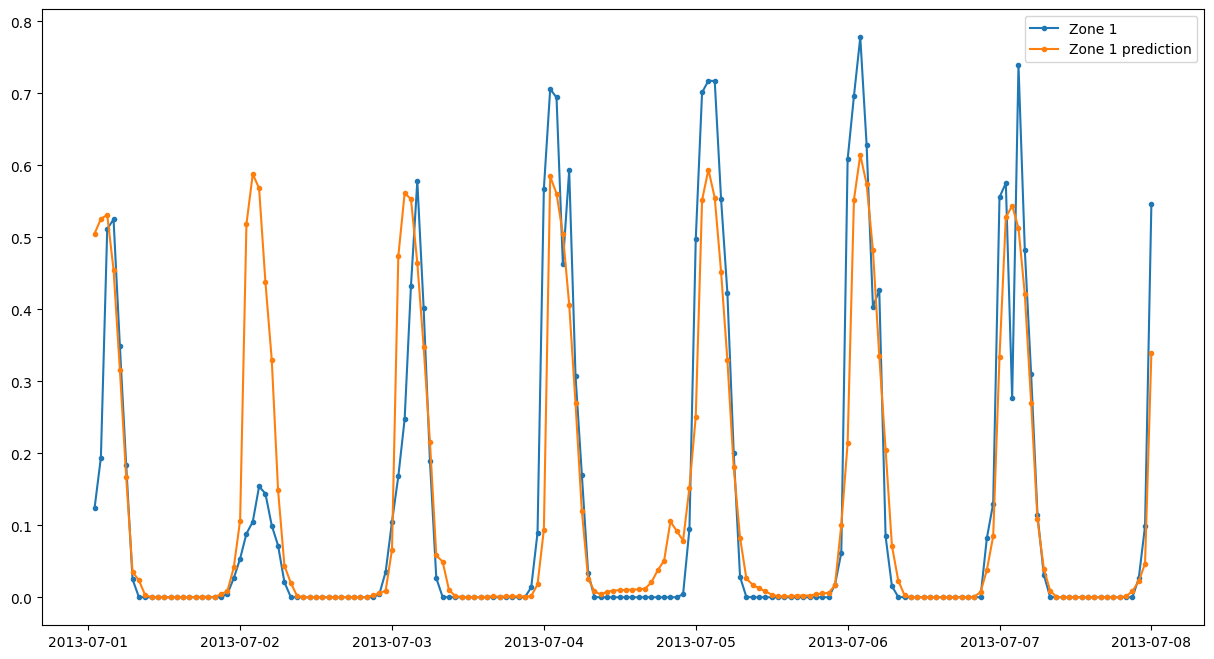

In [22]:
clf.fit(trainZone_one[features].loc[trainZone_one.index[0]:(trainZone_one.index[-1]-forecastPeriod)], trainZone_one['POWER'].loc[(trainZone_one.index[0]+(forecastPeriod)):])
testZone_one['prediction'] = clf.predict(testZone_one.loc[:, features])
print("Zone 1")
print("Mean absolute error - ",MAE(testZone_one['prediction'] , testZone_one['POWER']))
print("Root mean absolute error - ", math.sqrt(MAE(testZone_one['prediction'] , testZone_one['POWER'])))

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(testZone_one['TIMESTAMP'].iloc[:forecastPeriod],testZone_one['POWER'].iloc[:forecastPeriod], label='Zone 1', marker = '.')
plt.plot(testZone_one['TIMESTAMP'].iloc[:forecastPeriod],testZone_one['prediction'].iloc[:forecastPeriod], label='Zone 1 prediction', marker = '.')
plt.legend()

Zone 2
Mean absolute error -  0.07662273382893037
Root mean absolute error -  0.2768081173465301


C:\Users\vynne\AppData\Local\Temp\ipykernel_22160\2546175961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testZone_two['prediction'] = clf.predict(testZone_two.loc[:, features])


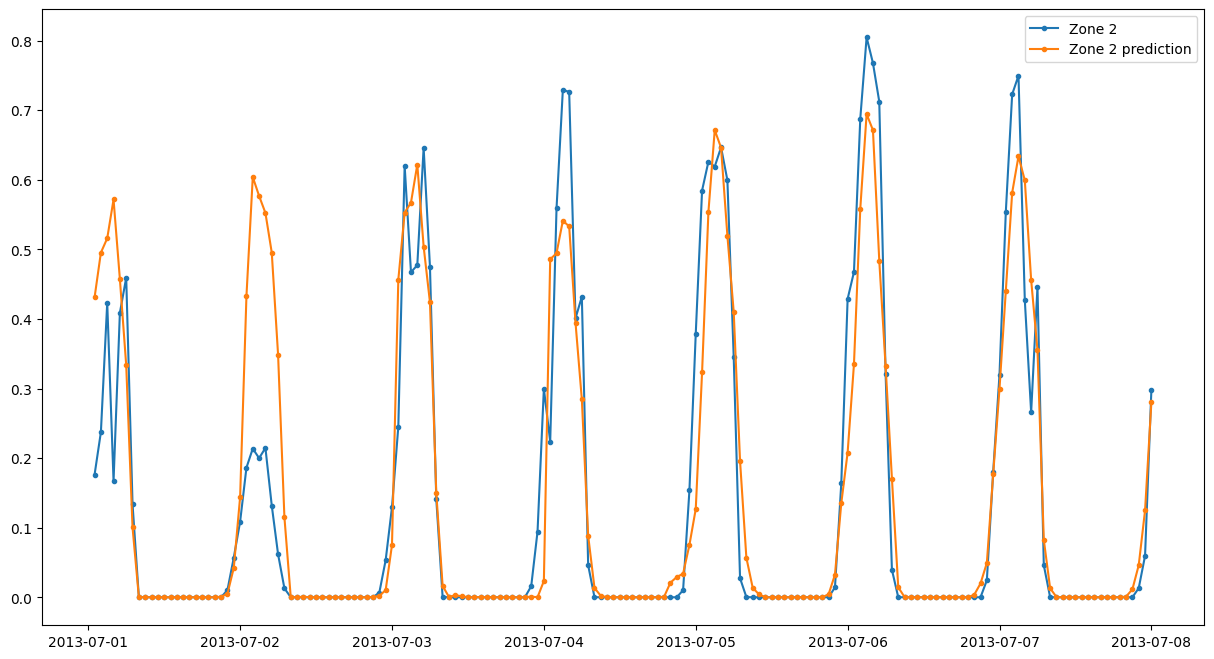

In [26]:
clf.fit(trainZone_two[features].loc[trainZone_two.index[0]:(trainZone_two.index[-1]-forecastPeriod)], trainZone_two['POWER'].loc[(trainZone_two.index[0]+(forecastPeriod)):])
testZone_two['prediction'] = clf.predict(testZone_two.loc[:, features])
print("Zone 2")
print("Mean absolute error - ",MAE(testZone_two['prediction'] , testZone_two['POWER']))
print("Root mean absolute error - ", math.sqrt(MAE(testZone_two['prediction'] , testZone_two['POWER'])))


fig, ax = plt.subplots(figsize=(15,8))
plt.plot(testZone_two['TIMESTAMP'].iloc[:forecastPeriod],testZone_two['POWER'].iloc[:forecastPeriod], label='Zone 2', marker = '.')
plt.plot(testZone_two['TIMESTAMP'].iloc[:forecastPeriod],testZone_two['prediction'].iloc[:forecastPeriod], label='Zone 2 prediction', marker = '.')
plt.legend()

Zone 3
Mean absolute error -  0.08020059032534246
Root mean absolute error -  0.28319708742383365


C:\Users\vynne\AppData\Local\Temp\ipykernel_22160\4058995148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testZone_three['prediction'] = clf.predict(testZone_three.loc[:, features])


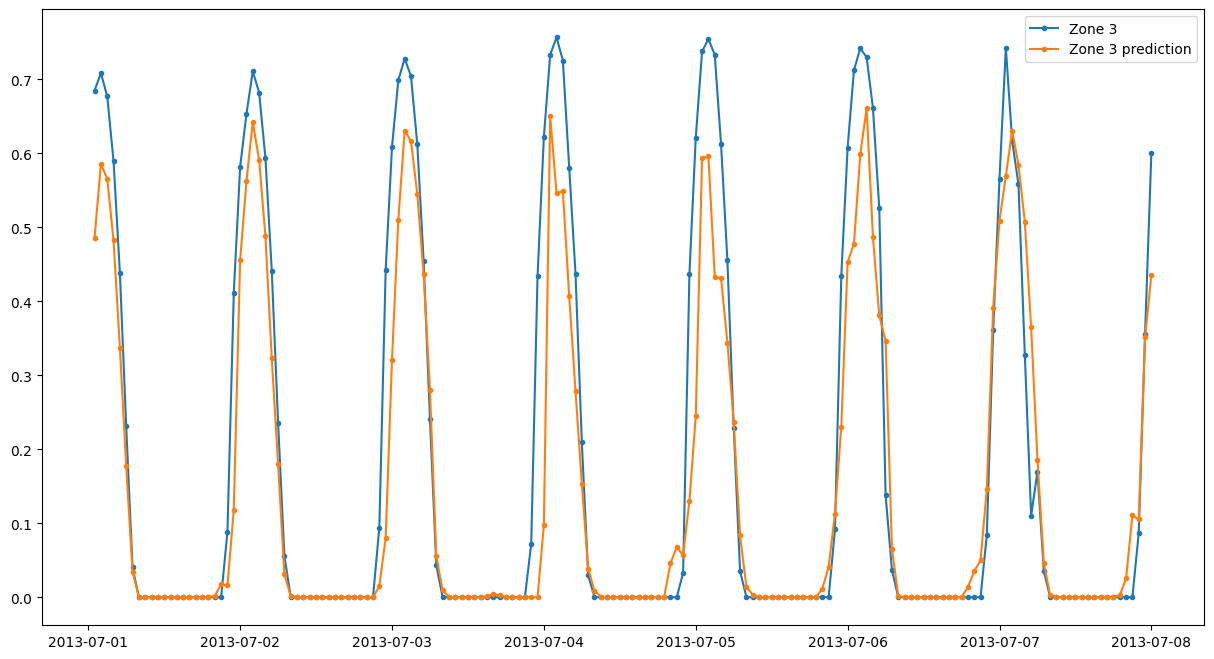

In [24]:
clf.fit(trainZone_three[features].loc[trainZone_three.index[0]:(trainZone_three.index[-1]-forecastPeriod)], trainZone_three['POWER'].loc[(trainZone_three.index[0]+(forecastPeriod)):])
testZone_three['prediction'] = clf.predict(testZone_three.loc[:, features])
print("Zone 3")
print("Mean absolute error - ",MAE(testZone_three['prediction'], testZone_three['POWER']))
print("Root mean absolute error - ", math.sqrt(MAE(testZone_three['prediction'], testZone_three['POWER'])))


fig, ax = plt.subplots(figsize=(15,8))
plt.plot(testZone_three['TIMESTAMP'].iloc[:forecastPeriod],testZone_three['POWER'].iloc[:forecastPeriod], label='Zone 3', marker = '.')
plt.plot(testZone_three['TIMESTAMP'].iloc[:forecastPeriod],testZone_three['prediction'].iloc[:forecastPeriod], label='Zone 3 prediction', marker = '.')
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (25,) and (169,)

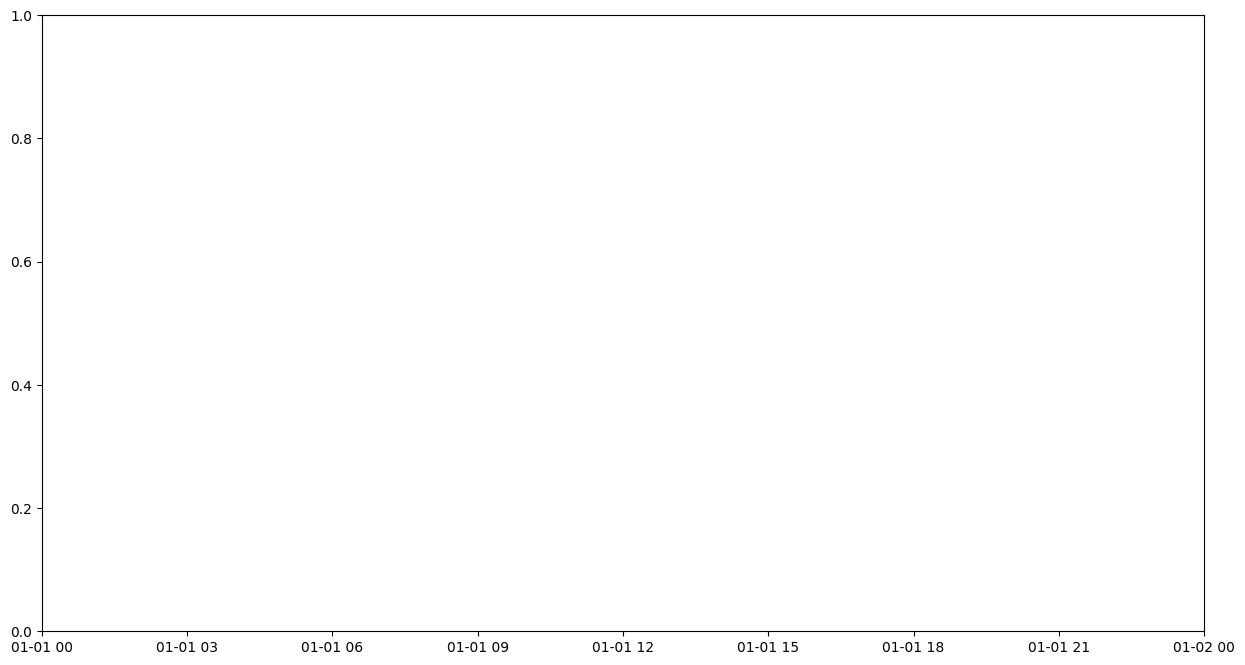

In [25]:
clf.fit(trainZone_one[features].loc[trainZone_one.index[0]:(trainZone_one.index[-1]-forecastPeriod)], trainZone_one['POWER'].loc[(trainZone_one.index[0]+(forecastPeriod)):])
pred1 = clf.predict(testZone_one.loc[(testZone_one.index[-1]-forecastPeriod):, features])

clf.fit(trainZone_two[features].loc[trainZone_two.index[0]:(trainZone_two.index[-1]-forecastPeriod)], trainZone_two['POWER'].loc[(trainZone_two.index[0]+(forecastPeriod)):])
pred2 = clf.predict(testZone_two.loc[(testZone_two.index[-1]-forecastPeriod):, features])

clf.fit(trainZone_three[features].loc[trainZone_three.index[0]:(trainZone_three.index[-1]-forecastPeriod)], trainZone_three['POWER'].loc[(trainZone_three.index[0]+(forecastPeriod)):])
pred3 = clf.predict(testZone_three.loc[(testZone_three.index[-1]-forecastPeriod):, features])

figure, axs = plt.subplots(figsize=(15,8))
plt.plot(pd.date_range(testZone_one['TIMESTAMP'].iat[-1], (testZone_one['TIMESTAMP'].iat[-1] + pd.tseries.offsets.DateOffset(hours = forecastPeriod)),periods=25),pred1, label='Zone 1 prediction', marker = '.')
plt.plot(pd.date_range(testZone_two['TIMESTAMP'].iat[-1], (testZone_two['TIMESTAMP'].iat[-1] + pd.tseries.offsets.DateOffset(hours = forecastPeriod)),periods=25),pred2, label='Zone 2 prediction', marker = '.')
plt.plot(pd.date_range(testZone_three['TIMESTAMP'].iat[-1], (testZone_three['TIMESTAMP'].iat[-1] + pd.tseries.offsets.DateOffset(hours = forecastPeriod)),periods=25),pred3, label='Zone 3 prediction', marker = '.')
plt.legend()

[0.4963695  0.39976675 0.41812275 ... 0.20059425 0.291289   0.370338  ]
0.0989541780568493


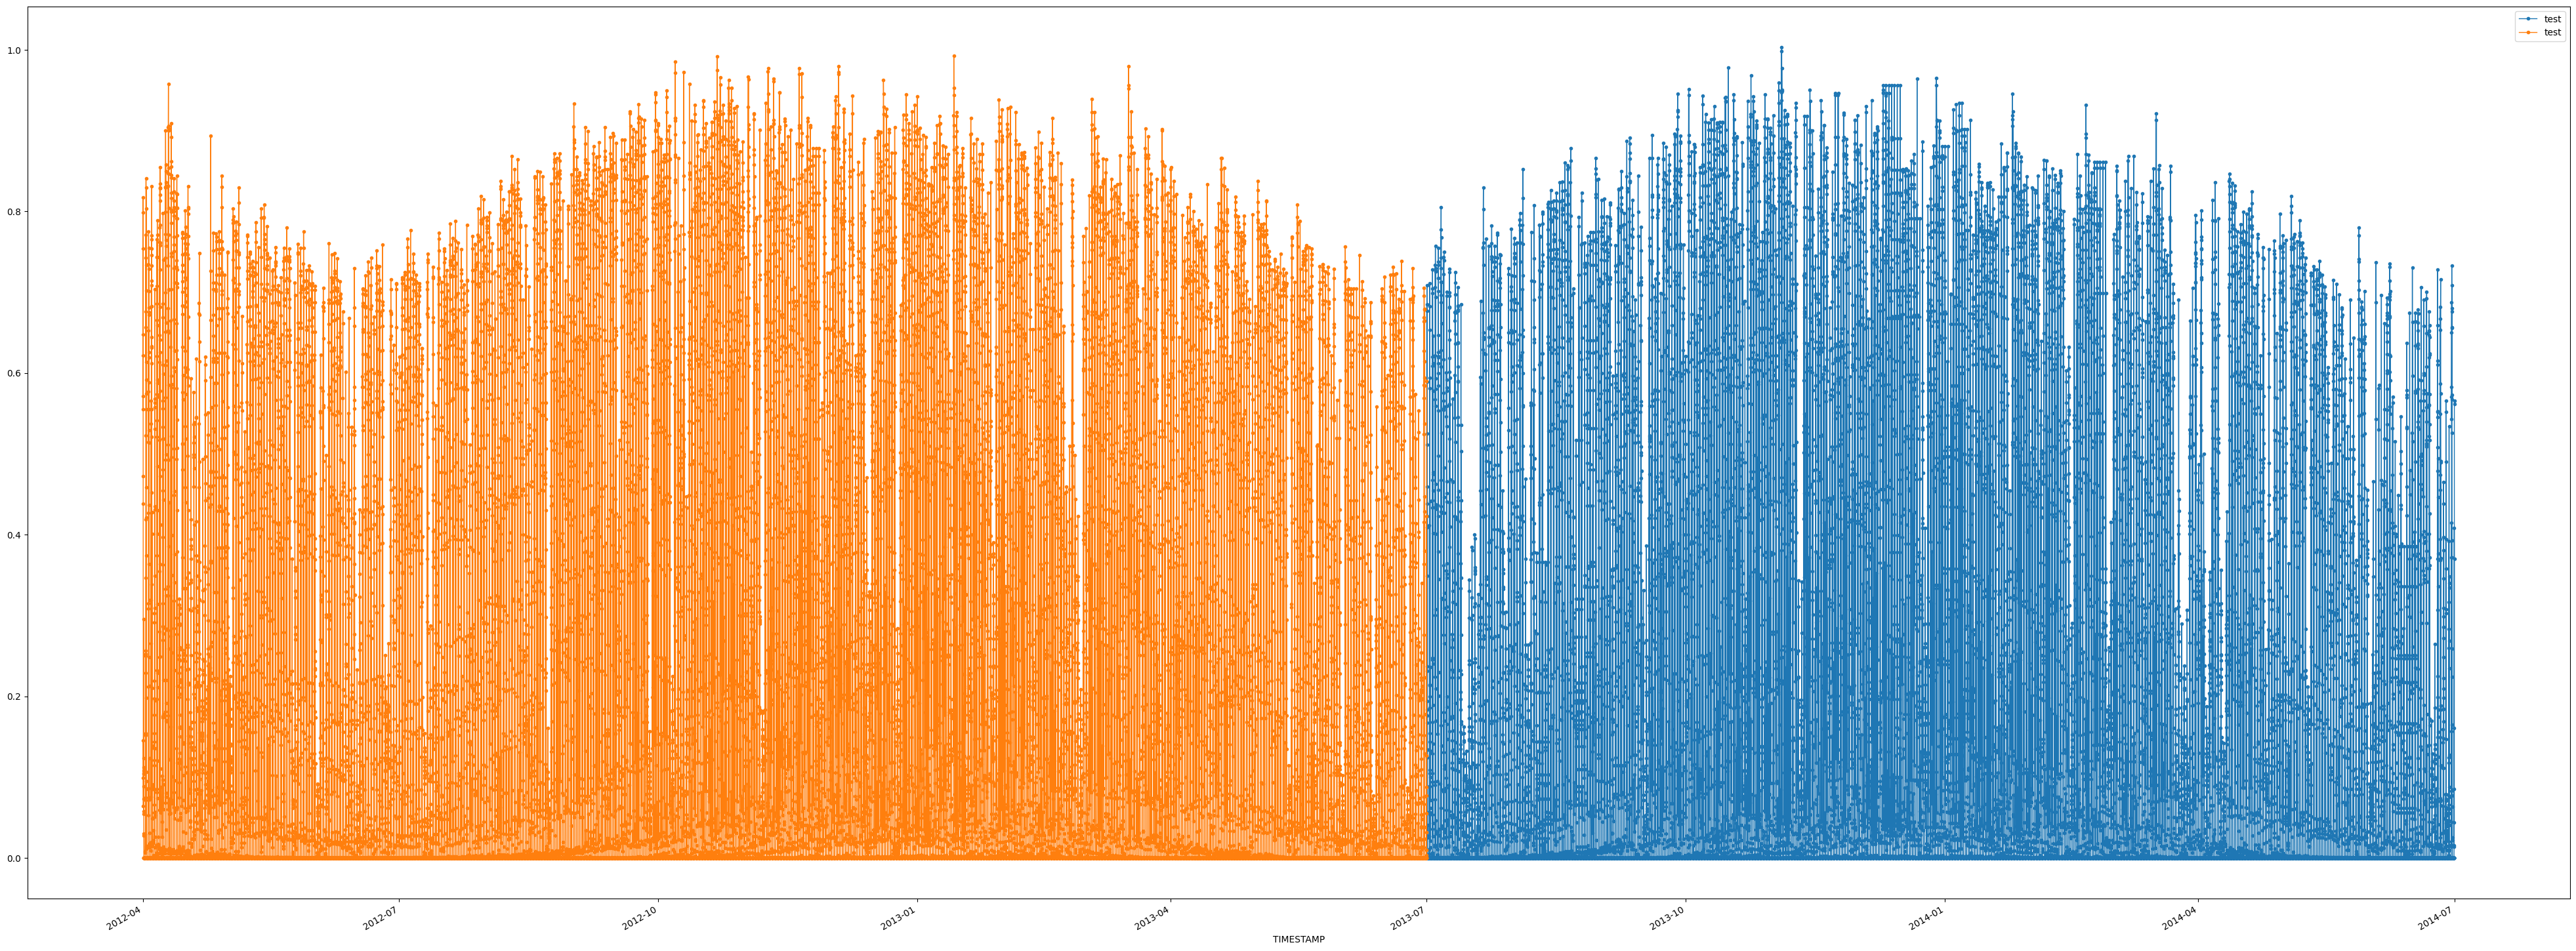

In [83]:
#shows how unreadable dataset is if graphed entirely

figure, axs = plt.subplots(figsize = (50,20))

# trainData.plot(x = 'TIMESTAMP', y = 'POWER', ax = axs, label = 'train')
# testData.plot(x = 'TIMESTAMP', y = 'POWER', ax = axs, label = 'test')

yPred = clf.predict(testZone_one.loc[:, features])
print(yPred)
print(MAE(yPred, testZone_one['POWER']))
# trainZone_one.plot(x = 'TIMESTAMP', y = 'POWER', ax = axs, label = 'predict')
testData.plot(x = 'TIMESTAMP', y = 'POWER', ax = axs, label = 'test', marker='.', linewidth=1)
trainData.plot(x = 'TIMESTAMP', y = 'POWER', ax = axs, label = 'test', marker='.', linewidth=1)
plt.show()